# Question 1

Here we attempt to calculate the bias and variance of various models which use linear regression with polynomial features of higher order terms over 10 different training datasets. The test set remains the same naturally.

## Getting the Dataset

The initial version of this project was run on google colab. Hence, there was some effort put into mounting the google  drive folder as a filesystem, and then subsequently navigating the file system. The following code just displays a tree of the current folder and proceeds to load the dataset for question 1.

In [1]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        for f in files:
            print('{}{}'.format(subindent, f))

list_files('./')

home = '.'

/
    37_assgn1.zip
    Assignment1.pdf
    bias.JPG
    formula.png
    notebook.tex
    output_19_0.png
    output_19_1.png
    output_21_0.png
    output_21_1.png
    output_23_0.png
    output_23_1.png
    output_23_2.png
    output_23_3.png
    output_23_4.png
    output_23_5.png
    output_23_6.png
    output_23_7.png
    output_23_8.png
    output_25_0.png
    output_25_1.png
    output_25_2.png
    output_25_3.png
    output_25_4.png
    output_25_5.png
    output_25_6.png
    output_25_7.png
    output_25_8.png
    output_6_0.png
    Q1.ipynb
    Q1.pdf
    Q1.py
    Q2.ipynb
    Q2.pdf
    Q2.py
    Question_1.ipynb
    test.ipynb
    variance.JPG
.ipynb_checkpoints/
    Q1-checkpoint.ipynb
    Q2-checkpoint.ipynb
    Question_1-checkpoint.ipynb
    test-checkpoint.ipynb
.vscode/
    settings.json
Q1_data/
    data.pkl
Q2_data/
    Fx_test.pkl
    X_test.pkl
    X_train.pkl
    Y_train.pkl


In [2]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

fname = home + "/Q1_data/data.pkl"
outfile = open(fname,'rb')

dataset = np.array(pickle.load(outfile))
outfile.close()
test_data = np.array([[]])
np.random.shuffle(dataset)

size = int(len(dataset)/10.0)

test_data = dataset[0:size,:]

dataset = np.delete(dataset,[i for i in range(0,size)],axis=0)

The above code segment uses pickle to load the dataset. We have shuffled the dataset using numpy to prevent inherent biases within our training sets. This should guarantee some amount of uniformity at the very least across the partitioned data. 

The training data is then extracted and deleted from the dataset. Now, the remaining dataset consists of 4500 entries. (The original dataset had 5000 pairs)

## Understanding The Dataset

Before we proceed to calculate bias and variance, it might be useful to understand the underlying dataset. This will give an understanding of what degree polynomials are likely to be an underfit or an overfit for the dataset. 

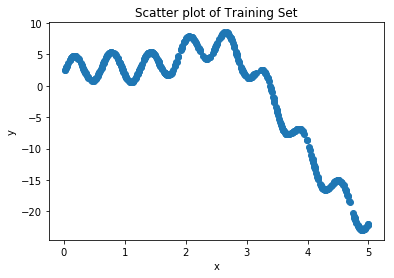

In [3]:
plt.scatter(dataset[0:size, 0], dataset[0:size, 1])

plt.title('Scatter plot of Training Set')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

Based on this graph, we can make confident guesses about the accuracy of certain models. Since the question asks us to use polynomials of the form:

![title](formula.png)

and so on until polynomial of degree nine. We predict with reason that lower order polynomials such as those below degree 3 will fail to accurately represent this dataset. It is very unlikely that any of these polynomials overfit on the dataset greatly as the graph given is expected to be of order fifteen based on the number of mountain and valleys.

As we train the models for various degrees of polynomials, we will also plot the graph to see how our hypothesis function fits on the existing dataset.

## Creating a Hypothesis Function

As part of our bias variance calculating, we require a function to calculate the hypothesized value after training our data for input test data

In [4]:
def hypothesis(xt, intercepts, coeff):
    
    intercept = np.copy(intercepts)
    coef = np.copy(coeff)
    x = np.copy(xt) 
    
    x = np.transpose(x)
    
    hyp = coeff.dot(x)
    hyp += intercept

    return hyp

## Variance Calculation

We calculate variance as follow:

![image.png](variance.jpg)

The below code first calculates the hypothesized value for each entry in our test point, according to 10 different models. It then calculates the expectation by taking the average followed by removing the point's corresponding hypothesized value in that model. This is then subsequently squared, summed, and divided by 10 once again to calculate expectation.

The code has been vectorized extensively as the coefficients and intercept variables are 2D arrays which contain information corresponding to each training set used to generate diff models. 

In [5]:
def variance_calc(xt, intercepts, coeff):
    intercept = np.copy([intercepts])
    coef = np.copy(coeff)
    x = np.copy([xt])
    intercept = np.array([intercept]).reshape(-1,1)

    hyp = hypothesis(x,intercept,coef)
    
    expec_hyp = np.sum(hyp)
    expec_hyp /= intercept.size
    expec_hyp_list = np.array([expec_hyp for i in range(intercept.size)]).reshape(-1,1)

    temp = hyp - expec_hyp_list
    temp = np.square(temp)
    variance = np.sum(temp)
    variance /= intercept.size
    
    return variance

## Bias Calculation

We calculate bias as follows:

![image.png](bias.jpg)

The below code is very similiar to the variance calculation in some aspects. One again here, we must use the expected value of hypothesis which is stored in the ```expec_hyp``` variable. The actual answer for our testing dataset has been passed as a parameter to the function. Here, we have calculated the absolute value of the bias rather than the square. Both measures are equally accurate in terms of correctness. 

In [6]:
def bias_calc(xt, intercepts, coeff, ans):
    
    intercept = np.copy([intercepts])
    coef = np.copy(coeff)
    x = np.copy([xt])
    
    intercept = np.array([intercept]).reshape(-1,1)

    hyp = hypothesis(x,intercept,coef)
    
    expec_hyp = np.sum(hyp)
    expec_hyp /= intercept.size
   
    #  E[f^(x)] - f(x)
    bias = abs(expec_hyp - ans)
    return bias

## Setting up datasets

This following section proceeds to actually answer the question (phew finally). Like before, this just sets up some variables to be used across the board along with the dataset.

In [7]:
variance_list = []
bias_list = []
table_data = []

fname = "./Q1_data/data.pkl"
outfile = open(fname,'rb')

dataset = np.array(pickle.load(outfile))
outfile.close()

test_data = np.array([[]])

# Shuffles the data randomly to remove biases in the data like before
np.random.shuffle(dataset)

size = int(len(dataset)/10.0)

# Remove the test data from the dataset
test_data = dataset[0:size,:]
dataset = np.delete(dataset, [i for i in range(0,size)], axis=0)

mean_bias =0
mean_variance = 0

# These will store the list of coefficients and intercepts across each of the training sets. These will be reset after ee
coef_list = np.array([[]])
intercept_list = np.array([])
degree_hypo_list = []

## Regressing for higher order polynomials

The following section generates bias and variance values for each degree of the polynomial in the range 1 to 9 inclusive. This includes running the regression on each of the 10 training subsets obtained in the first section. 

To generate the features, we use the inbuilt functionality of PolynomialFeatures with bias turned to False. This is because LinearRegression has intercept calculation built in, which voids the need for a column of 1's as a feature.

The following code also plots the hypothesized value along with the scatter plot of our actual data. This is to provide a better understanding of how the hypothesis function performs.

In [8]:
for i in range(1,10):
    x_train = np.copy([dataset[:,0]]).reshape(-1,1)
    y_train = np.copy([dataset[:,1]]).reshape(-1,1)
    x_test = np.copy([test_data[:,0]]).reshape(-1,1)
    y_test = np.copy([test_data[:,1]]).reshape(-1,1)
        
    
    size = int(x_train.shape[0]/10)
    full_size = x_train.shape[0]
    
    start =0
    end = size
    mean_bias =0
    mean_variance = 0
    
    coef_list = np.array([])
    intercept_list = np.array([])

    poly = PolynomialFeatures(i,include_bias=False)
    x_train = poly.fit_transform(x_train)
    
    poly = PolynomialFeatures(i,include_bias=False)
    x_test = poly.fit_transform(x_test)
    
    hypo_degree = []
    
    count = 0
    for x in range(10):
        
        regressor = LinearRegression()  
        regressor.fit(x_train[start:end,:], y_train[start:end,:]) #training the algorithm

        #To retrieve the intercept:
        intercept = regressor.intercept_
        intercept_list = np.append(intercept_list, float(intercept))

        #For retrieving the slope:
        coef = regressor.coef_
        coef_list = np.append(coef_list, coef[0])
        
        start += size
        end += size
        count +=1
        
    coef_list = np.resize(coef_list,(10,i))
    
    for calc in range(int(test_data.shape[0])):
        temp = hypothesis(x_test[calc], intercept_list, coef_list)
        hypo_degree.append(temp[0])
        mean_bias += bias_calc(x_test[calc,:], intercept_list, coef_list, y_test[calc,0]) ** 2
        mean_variance += variance_calc(x_test[calc,:], intercept_list, coef_list)

    degree_hypo_list.append(hypo_degree)
        
    mean_bias /= test_data.shape[0]
    mean_variance /= test_data.shape[0]
    
    bias_list.append(mean_bias)
    variance_list.append(mean_variance)
    table_data.append([i, mean_bias, mean_variance])

## Tabulate the Data

Let us view the results of the model for various degrees of polynomials on the test set. The below table displays the average bias^2 and average variance for each corresponding degree of the polynomial.

In [9]:
from tabulate import tabulate
print(tabulate(table_data, headers=['Degree', 'Bias^2', 'Variance']))

  Degree    Bias^2    Variance
--------  --------  ----------
       1  30.3991    0.100752
       2   5.87949   0.0332493
       3   4.72339   0.0350122
       4   2.99201   0.0304211
       5   2.92495   0.0326389
       6   2.72942   0.035889
       7   2.56241   0.0338634
       8   2.57427   0.0367606
       9   2.57803   0.0379971


## Graphing the data

We may proceed to graph the obtained data for better insight into the training model.

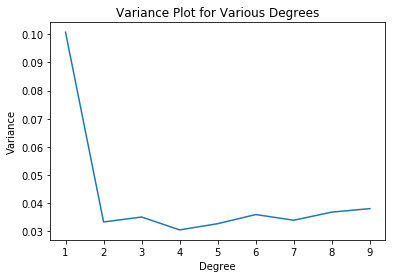

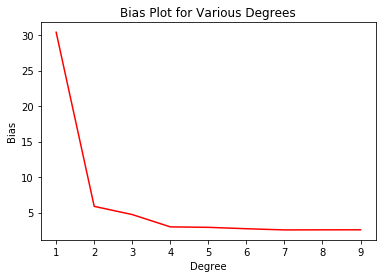

In [10]:
plt.plot([i for i in range(1, 10)], variance_list)
plt.title('Variance Plot for Various Degrees')
plt.xlabel('Degree')
plt.ylabel('Variance')
plt.show()

plt.plot([i for i in range(1, 10)], bias_list, color='red')
plt.title('Bias Plot for Various Degrees')
plt.xlabel('Degree')
plt.ylabel('Bias')
plt.show()

We can clearly see how the bias and variance change as a function of degree. When we began our regression with degree one polynomial, we can see high bias and high variance, which indicated general bad performance of the model when a polynomial of degree one is used.

As we progress however, the bias drops as the model is able to more accurately model the training data, due to the polynomial features available. However, as the degree of the polynomial increases, the model seems to represent an overfit as the bias drops but variance simultaneously increases. This is most likely an indication that the test set varied from the training set and the model over-learnt the training data.

Apart from the graphical interpretation, we can see that the bias values are dropping from the table above. The values have a steeper decline initially followed by a much slower reduction in bias.

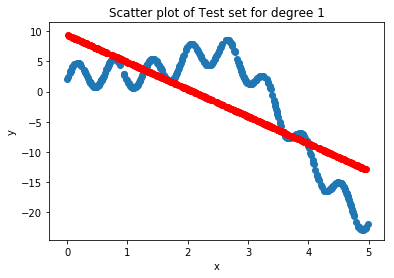

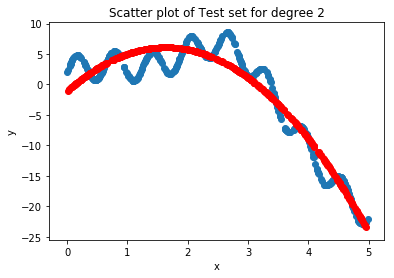

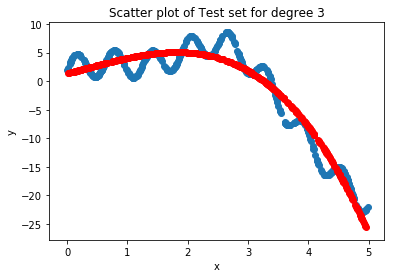

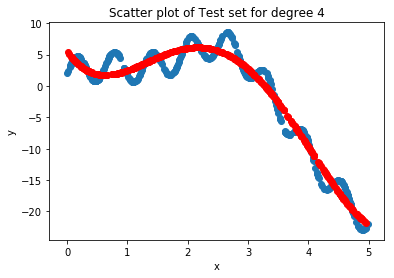

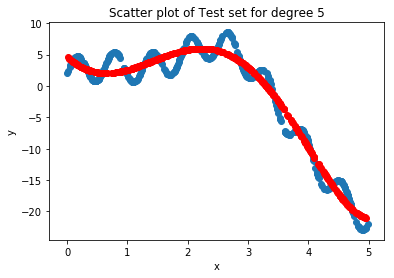

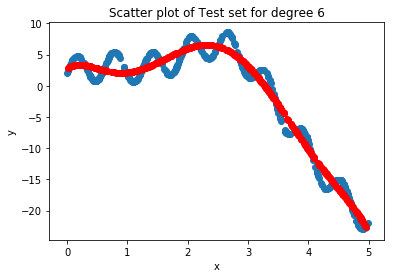

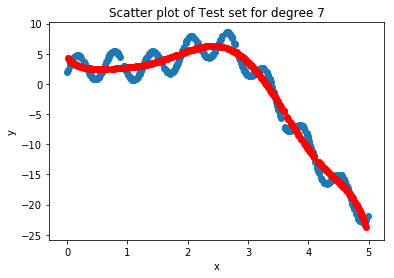

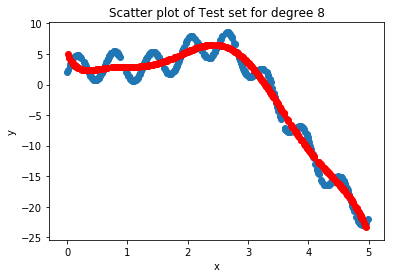

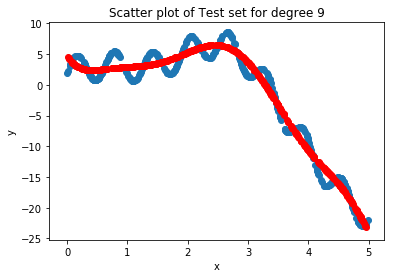

In [11]:
for i in range(1, 10):
    plt.scatter(dataset[0:size, 0], dataset[0:size, 1])
    plt.scatter(test_data[:,0], degree_hypo_list[i-1], color='red')
    plt.title('Scatter plot of Test set for degree {}'.format(i))

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

Here the red line is a representation of the performance of the model for each degree of polynomial when represented with the training data. This form of representation makes it easier for us to see how adding additional polynomial features in the form of x^i makes our hypothesis function more and more accurate. 

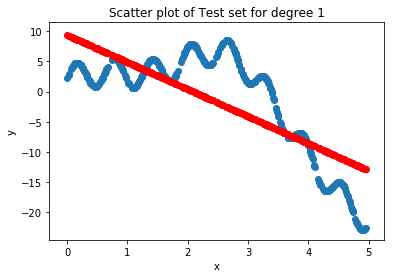

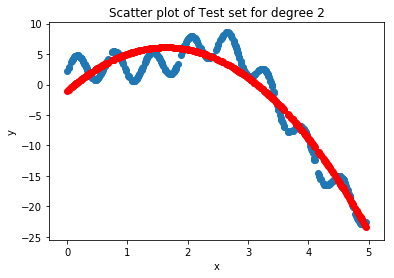

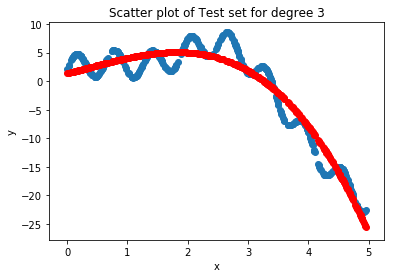

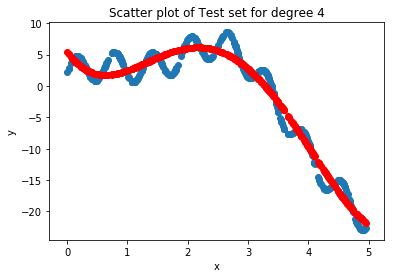

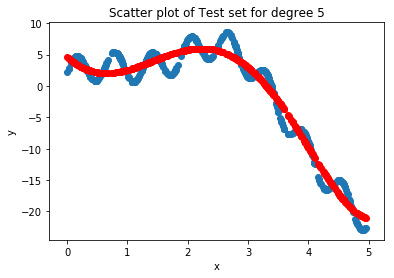

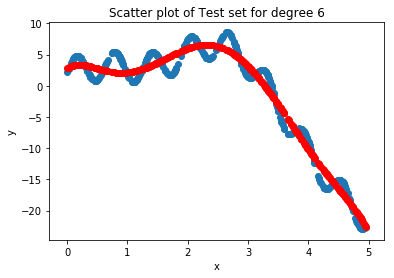

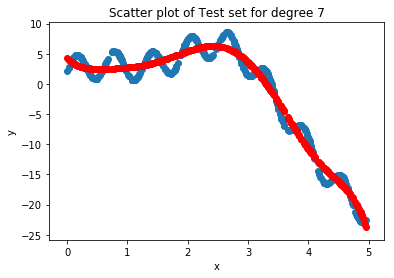

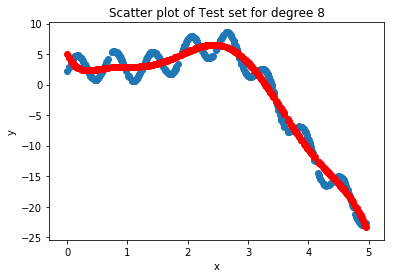

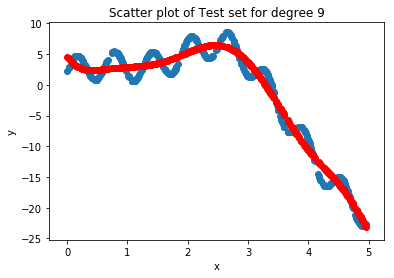

In [12]:
for i in range(1, 10):
    plt.scatter(x_test[:, 0], y_test[:, 0])
    plt.scatter(x_test[:,0], degree_hypo_list[i-1], color='red')
    plt.title('Scatter plot of Test set for degree {}'.format(i))

    plt.xlabel('x')
    plt.ylabel('y')

    plt.show()

Here the red line is a representation of the performance of the model for each degree of polynomial when tested on the test data. This form of representation makes it easier for us to see how adding additional polynomial features in the form of x^i makes our hypothesis function more and more accurate. Since the dataset has been shuffled uniformly and since each dataset chosen has sufficient datapoints, the test data plotted here resembles the training data. Hence, the graphs look similiar